In [11]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [2]:
# image functions
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img
def toGray(im, im_L=10, im_W=10, contrast=1.0):
    # normalize
    gray = np.zeros([im_L, im_W])
    for j in range(im_L):
        for i in range(im_W):
            gray[j][i] = max(im[j][i]) * contrast
    gray = convert(gray, 0, 255, np.uint8)
    return gray

In [3]:
# import data and label data
num_samples = 200
sample_set = np.empty([num_samples*9, 10, 10])
sample_labels = np.empty(num_samples*9)
baseDir = 'ShapeGroups'
idx = 0
shape_id = 0
for filename in os.listdir(baseDir):
    folder = baseDir + '/' + filename
    for imagepath in os.listdir(folder):
        imagepathFull = folder + '/' + imagepath
        print(imagepathFull)
        sample_set[idx] = toGray(cv2.imread(imagepathFull))
        sample_labels[idx] = shape_id
        # print("\n" + im
        # print(training_set[idx])
        idx += 1
    shape_id += 1
sample_set = sample_set[0:idx,]
sample_labels = sample_labels[0:idx,]

ShapeGroups/shape0/0_00.png
ShapeGroups/shape0/0_21.png
ShapeGroups/shape0/101_22.png
ShapeGroups/shape0/104_00.png
ShapeGroups/shape0/104_10.png
ShapeGroups/shape0/106_21.png
ShapeGroups/shape0/107_22.png
ShapeGroups/shape0/108_21.png
ShapeGroups/shape0/109_02.png
ShapeGroups/shape0/10_01.png
ShapeGroups/shape0/10_02.png
ShapeGroups/shape0/110_00.png
ShapeGroups/shape0/110_01.png
ShapeGroups/shape0/111_01.png
ShapeGroups/shape0/111_12.png
ShapeGroups/shape0/113_01.png
ShapeGroups/shape0/113_22.png
ShapeGroups/shape0/114_11.png
ShapeGroups/shape0/115_00.png
ShapeGroups/shape0/115_10.png
ShapeGroups/shape0/115_12.png
ShapeGroups/shape0/116_00.png
ShapeGroups/shape0/116_11.png
ShapeGroups/shape0/116_22.png
ShapeGroups/shape0/117_22.png
ShapeGroups/shape0/119_10.png
ShapeGroups/shape0/119_12.png
ShapeGroups/shape0/11_00.png
ShapeGroups/shape0/11_10.png
ShapeGroups/shape0/11_21.png
ShapeGroups/shape0/121_20.png
ShapeGroups/shape0/121_21.png
ShapeGroups/shape0/122_01.png
ShapeGroups/shape0/

In [72]:



baseDir = 'ShapeGroups'
folder = baseDir + '/' + 'shape5'
num_samples = len(os.listdir(folder))
print(num_samples)
sample_set = np.empty([num_samples*9, 10, 10])
sample_labels = np.empty(num_samples*9)

idx = 0
shape_id = 0
for imagepath in os.listdir(folder):
    imagepathFull = folder + '/' + imagepath
    print(imagepathFull)
    sample_set[idx] = random_noise(toGray(cv2.imread(imagepathFull)), mode='s&p')
    sample_labels[idx] = shape_id
    idx = idx + 1
    # print("\n" + im
    # print(training_set[idx])
sample_set = sample_set[0:idx,]
sample_labels = sample_labels[0:idx,]

233
ShapeGroups/shape5/100_21.png
ShapeGroups/shape5/101_10.png
ShapeGroups/shape5/102_00.png
ShapeGroups/shape5/102_01.png
ShapeGroups/shape5/102_21.png
ShapeGroups/shape5/106_20.png
ShapeGroups/shape5/106_22.png
ShapeGroups/shape5/107_21.png
ShapeGroups/shape5/109_01.png
ShapeGroups/shape5/10_11.png
ShapeGroups/shape5/110_22.png
ShapeGroups/shape5/111_20.png
ShapeGroups/shape5/111_22.png
ShapeGroups/shape5/112_10.png
ShapeGroups/shape5/114_20.png
ShapeGroups/shape5/114_22.png
ShapeGroups/shape5/115_22.png
ShapeGroups/shape5/116_01.png
ShapeGroups/shape5/116_20.png
ShapeGroups/shape5/117_02.png
ShapeGroups/shape5/119_20.png
ShapeGroups/shape5/11_02.png
ShapeGroups/shape5/121_10.png
ShapeGroups/shape5/121_12.png
ShapeGroups/shape5/122_20.png
ShapeGroups/shape5/122_22.png
ShapeGroups/shape5/123_20.png
ShapeGroups/shape5/124_20.png
ShapeGroups/shape5/125_10.png
ShapeGroups/shape5/125_12.png
ShapeGroups/shape5/125_20.png
ShapeGroups/shape5/126_11.png
ShapeGroups/shape5/126_21.png
ShapeGro

In [73]:
#convert from bitmap to spikes
time_step = 100
spike_set = []
for idx in range(len(sample_set)):
    print("shape " + str(idx))
    sample = sample_set[idx]
    spikes = []
    for col in range(np.shape(sample)[0]):
        row_spikes = []
        for row in range(np.shape(sample)[1]):
            if sample[col][row] == 0:
                row_spikes.append(row*time_step)
            else:
                sample[col][row] = 128
        spikes.append(row_spikes)
    spike_set.append(spikes)



shape 0
shape 1
shape 2
shape 3
shape 4
shape 5
shape 6
shape 7
shape 8
shape 9
shape 10
shape 11
shape 12
shape 13
shape 14
shape 15
shape 16
shape 17
shape 18
shape 19
shape 20
shape 21
shape 22
shape 23
shape 24
shape 25
shape 26
shape 27
shape 28
shape 29
shape 30
shape 31
shape 32
shape 33
shape 34
shape 35
shape 36
shape 37
shape 38
shape 39
shape 40
shape 41
shape 42
shape 43
shape 44
shape 45
shape 46
shape 47
shape 48
shape 49
shape 50
shape 51
shape 52
shape 53
shape 54
shape 55
shape 56
shape 57
shape 58
shape 59
shape 60
shape 61
shape 62
shape 63
shape 64
shape 65
shape 66
shape 67
shape 68
shape 69
shape 70
shape 71
shape 72
shape 73
shape 74
shape 75
shape 76
shape 77
shape 78
shape 79
shape 80
shape 81
shape 82
shape 83
shape 84
shape 85
shape 86
shape 87
shape 88
shape 89
shape 90
shape 91
shape 92
shape 93
shape 94
shape 95
shape 96
shape 97
shape 98
shape 99
shape 100
shape 101
shape 102
shape 103
shape 104
shape 105
shape 106
shape 107
shape 108
shape 109
shape 110


In [74]:
import matplotlib.pyplot as plt

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 128. 128. 128. 128. 128. 128. 128. 128.   0.]
 [  0. 128. 128. 128. 128. 128.   0. 128.   0.   0.]
 [  0. 128. 128. 128. 128. 128. 128. 128. 128.   0.]
 [  0. 128. 128. 128. 128. 128. 128. 128. 128.   0.]
 [  0. 128. 128. 128. 128. 128. 128. 128. 128.   0.]
 [  0. 128. 128. 128. 128. 128. 128. 128. 128.   0.]
 [  0. 128. 128. 128. 128. 128. 128. 128. 128.   0.]
 [  0. 128. 128. 128. 128. 128. 128. 128. 128.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


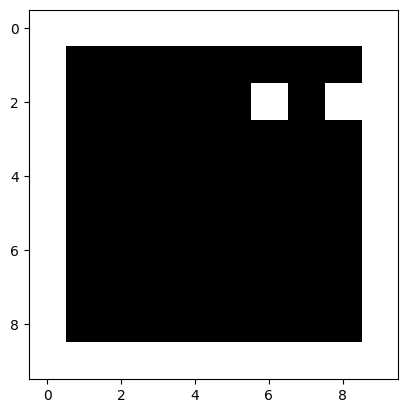

In [75]:
example_id = 50

fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect(1)
plt.imshow(255-sample_set[example_id], cmap='gray')
print(sample_set[example_id])

In [76]:
# shape = toGray(cv2.imread('sample0SC.png'), im_L=30, im_W=30)
# shape = shape[20:30, :]

[[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 900], [0, 600, 800, 900], [0, 900], [0, 900], [0, 900], [0, 900], [0, 900], [0, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]]


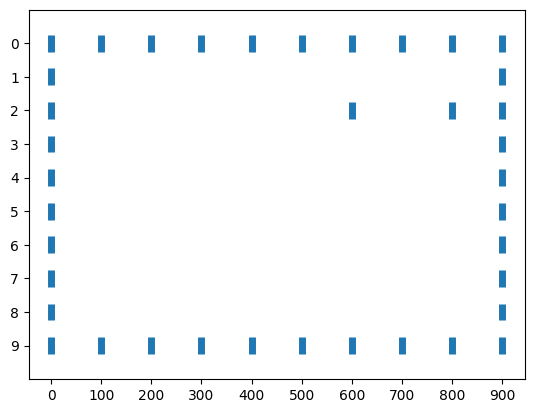

In [77]:
import pickle
# generate spikes from actual samples
print(spike_set[example_id])
fig, ax = plt.subplots()
plt.eventplot(spike_set[example_id], linelengths=.5, linewidths=5)
ax.invert_yaxis()
ax.set_yticks(range(10))
ax.set_xticks([0, 100, 200, 300, 400, 500, 600 ,700, 800, 900])
plt.show()
# save dataset to binary
with open("spike_set_noise/spike_set_noise5.bin", "wb") as output:
    pickle.dump(spike_set, output)

[[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], [0, 900, 1000, 1900], [0, 900, 1000, 1900], [0, 900, 1000, 1900], [0, 900, 1000, 1900], [0, 900, 1000, 1900], [0, 900, 1000, 1900], [0, 900, 1000, 1900], [0, 900, 1000, 1900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]]


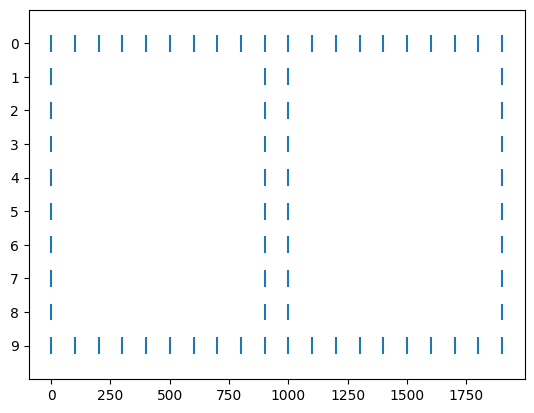

In [24]:
two_spike = [[] for _ in range(10)]
first = spike_set[example_id]
second = spike_set[example_id+1]
for idx in range(10):
    channela = first[idx]
    channelb = second[idx]
    channelb = [x+1000 for x in channelb]
    # print(channela)
    # print(channelb)
    for jdx in range(len(channela)):
        two_spike[idx].append(channela[jdx])
    for jdx in range(len(channelb)):
        two_spike[idx].append(channelb[jdx])
    # print(two_spike[idx])

print(two_spike)
fig, ax = plt.subplots()
plt.eventplot(two_spike, linelengths=.5)
ax.invert_yaxis()
ax.set_yticks(range(10))
plt.show()

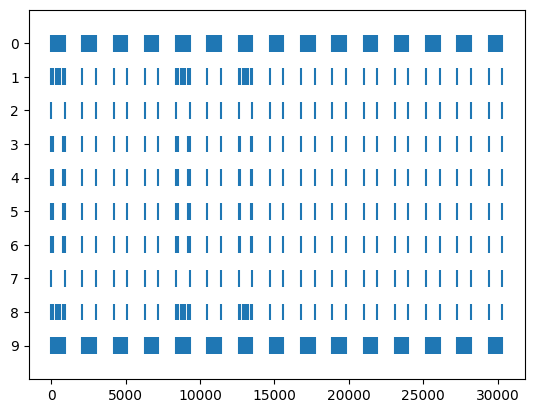

In [50]:
num_spikes = 15
num_channels = 10
multi_spike = [[] for _ in range(num_channels)]
ex_start = 10
spikes = spike_set[ex_start:ex_start+num_spikes]

for channel_idx in range(num_channels):

    channels = [[] for _ in range(num_spikes)]
    for spike_jdx in range(num_spikes):
        channels[spike_jdx] = [x+2100*spike_jdx for x in spikes[spike_jdx][channel_idx]]
        for channel_jdx in range(len(channels[spike_jdx])):
            multi_spike[channel_idx].append(channels[spike_jdx][channel_jdx])
    # for jdx in range(len(channela)):
    #     two_spike[idx].append(channela[jdx])
    # for jdx in range(len(channelb)):
    #     two_spike[idx].append(channelb[jdx])
    # for spike_jdx in range[num_spikes]:

# print(multi_spike)
fig, ax = plt.subplots()
plt.eventplot(multi_spike, linelengths=.5)
ax.invert_yaxis()
ax.set_yticks(range(10))
plt.show()

In [11]:
import pickle

In [47]:
# save dataset to binary
with open("spike_train5_15.bin", "wb") as output:
    pickle.dump(multi_spike, output)

[[], [400, 500], [300, 400, 500, 600], [300, 600], [200, 300, 600, 700], [200, 700], [100, 200, 700, 800], [100, 800], [100, 200, 300, 400, 500, 600, 700, 800], []]


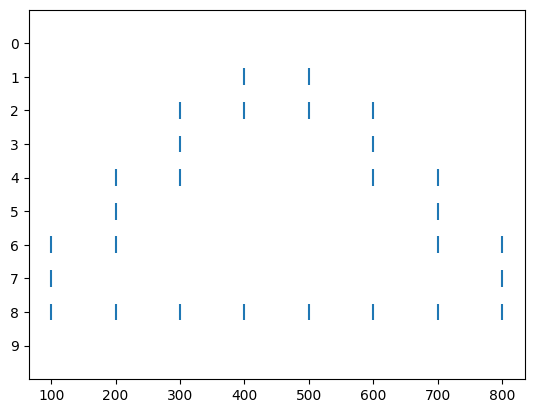

In [14]:
# load dataset from binary
with open("spike sets/spike_set0.bin", "rb") as data:
    training_set = pickle.load(data)

spike_example = training_set[0]
print(spike_example)
fig, ax = plt.subplots()
plt.eventplot(spike_example, linelengths=.5)
ax.invert_yaxis()
ax.set_yticks(range(10))
plt.show()

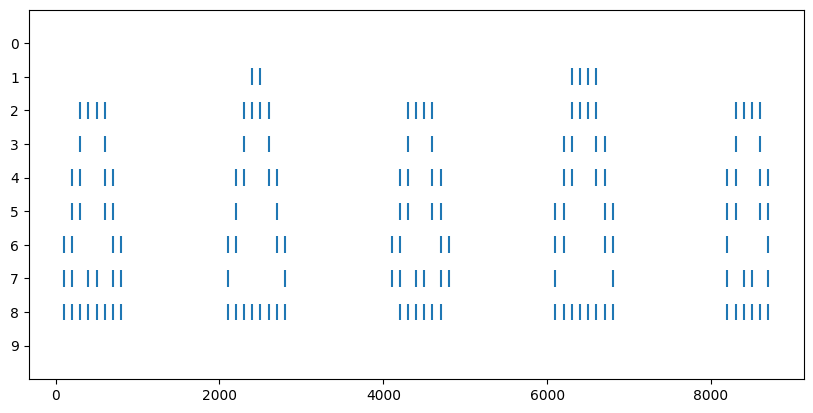

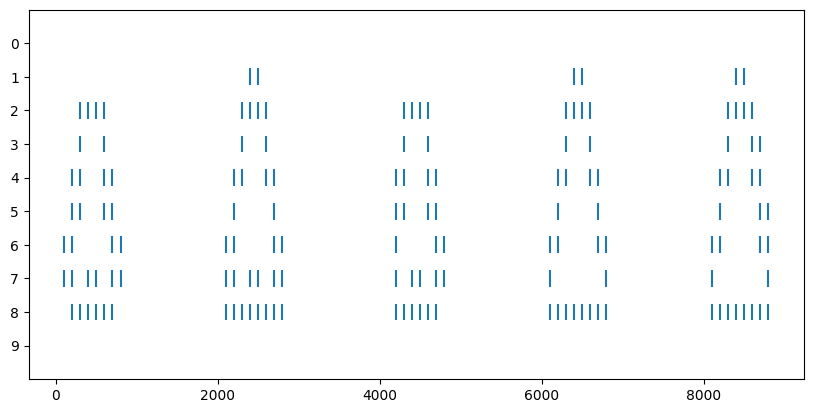

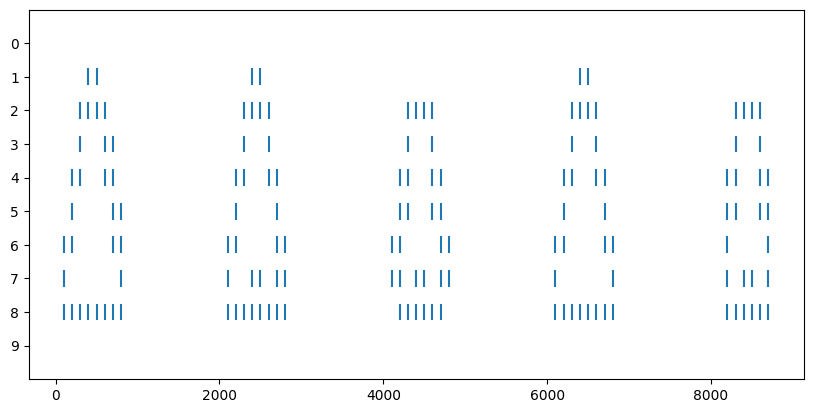

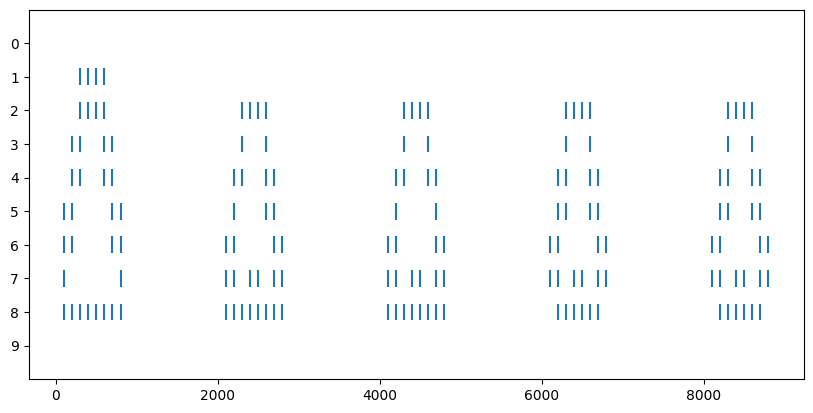

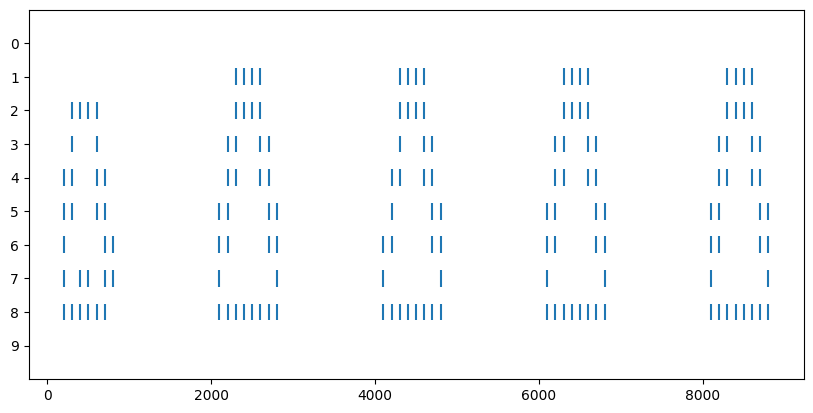

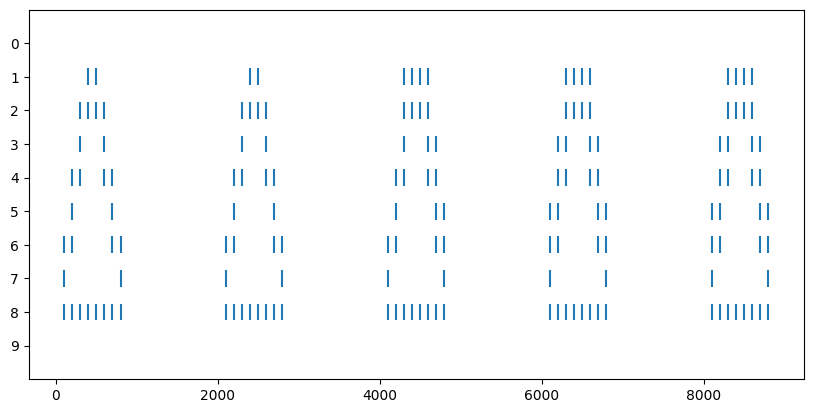

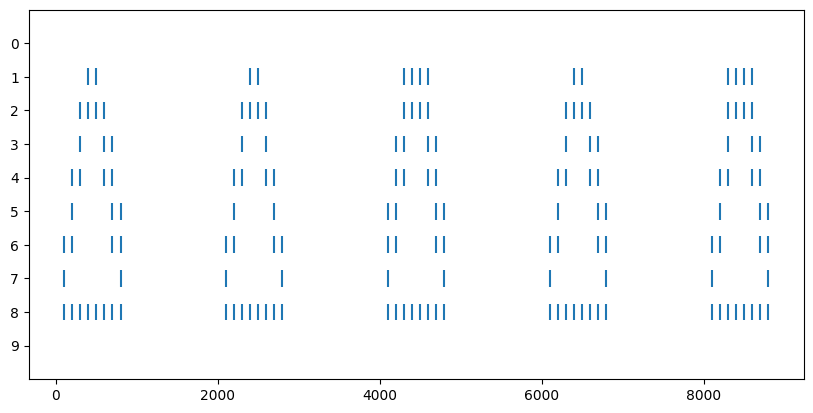

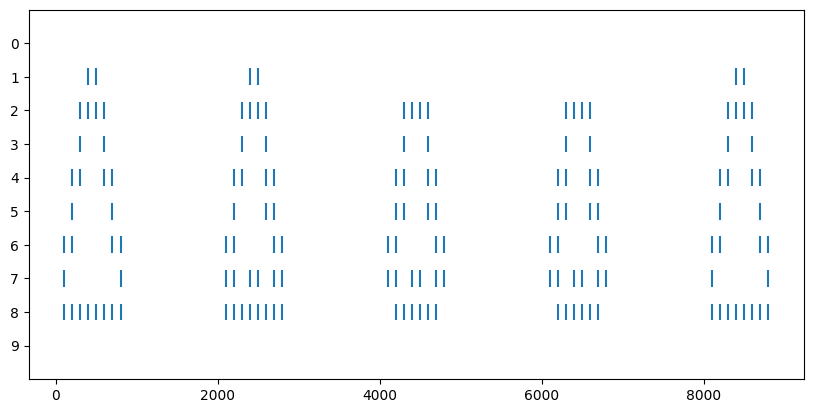

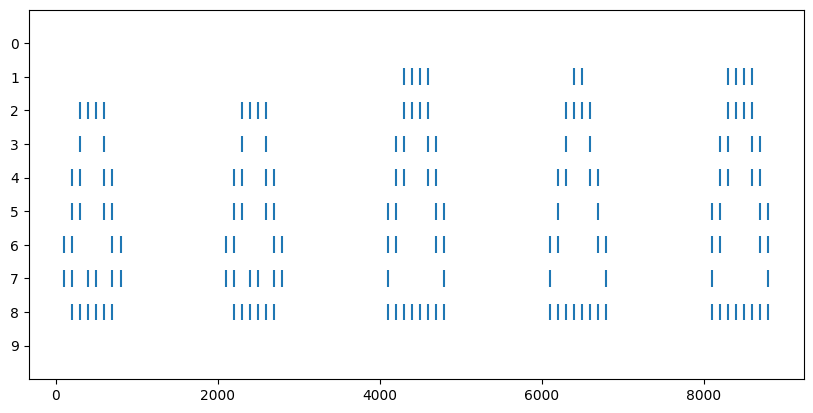

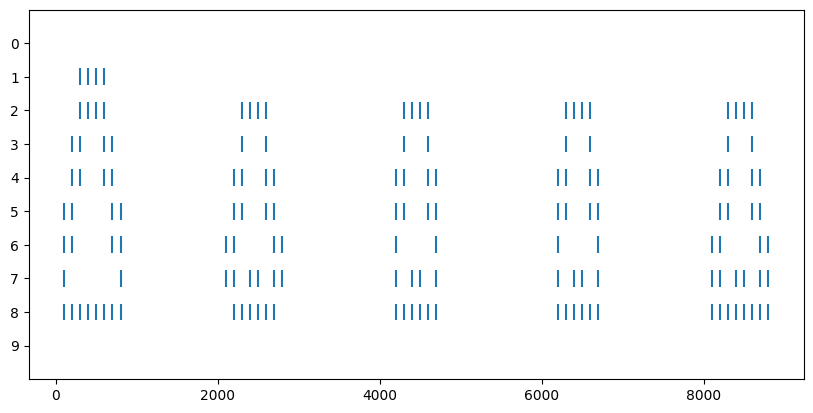

In [16]:
# generates num_parts # of spike train files with num_spikes # of spikes in each file
with open("spike sets/spike_set0.bin", "rb") as data:
    training_set = pickle.load(data)

num_spikes = 5
num_channels = 10
num_parts = 10
for part in range(num_parts):
    multi_spike = [[] for _ in range(num_channels)]
    ex_start = int(np.floor(len(training_set)*.8+part*num_spikes))
    spikes = training_set[ex_start:ex_start+num_spikes]
    for channel_idx in range(num_channels):

        channels = [[] for _ in range(num_spikes)]
        for spike_jdx in range(num_spikes):
            channels[spike_jdx] = [x+2000*spike_jdx for x in spikes[spike_jdx][channel_idx]]
            for channel_jdx in range(len(channels[spike_jdx])):
                multi_spike[channel_idx].append(channels[spike_jdx][channel_jdx])

    # print(multi_spike)
    fig, ax = plt.subplots()
    plt.eventplot(multi_spike, linelengths=.5)
    ax.invert_yaxis()
    ax.set_yticks(range(10))
    fig.set_figwidth(10)
    plt.show()

    # with open("spike parts/spike_train5" + "_" + str(part) + "_10.bin", "wb") as output:
    #     pickle.dump(multi_spike, output)

In [95]:
dir = "spike_test"
list_dir = os.listdir(dir)
for file_idx in range(len(os.listdir(dir))):
    print(dir + "/" + list_dir[file_idx])

spike_test/spike_test.zip
spike_test/spike_train0_15.bin
spike_test/spike_train1_15.bin
spike_test/spike_train2_15.bin
spike_test/spike_train3_15.bin
spike_test/spike_train4_15.bin
spike_test/spike_train5_15.bin


20


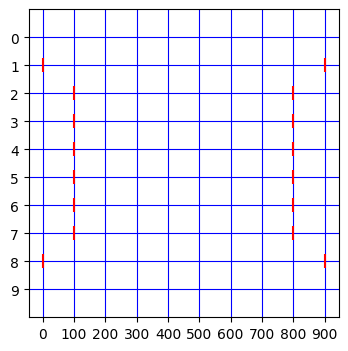

In [40]:
import pickle
import numpy as np
with open("spike_set_min\spike_set4_min.bin", "rb") as data:
    spike_train = pickle.load(data)
# with open("spike sets\spike_set0.bin", "rb") as data:
#     spike_train = pickle.load(data)

print(int(len(spike_train)))
for i in range(1):
    fig, ax = plt.subplots()
    plt.eventplot(spike_train[i], linelengths=.5, color='r')
    ax.invert_yaxis()
    ax.set_yticks(range(10))
    ax.set_xticks(np.linspace(0, 900, 10))
    # ax.axis('tight')
    # ax.axis('off')
    fig = plt.gcf()
    plt.grid(True, which='both', color='b')
    fig.set_size_inches(4, 4)
    plt.show()

In [79]:
# make a combined benchmark spike set with 50 spikes trains from each shape
spike_folder = 'spike_set_noise/'
spike_sets = ['spike_set_noise0.bin', 'spike_set_noise1.bin', 'spike_set_noise2.bin', 'spike_set_noise3.bin', 'spike_set_noise5.bin']

spike_id = []
spike_set = []

for spike_name in spike_sets:
    file = spike_folder + spike_name
    with open(file, "rb") as data:
        spikes_train = pickle.load(data)
    for spike_idx in range(60):
        spike_set.append(spikes_train[spike_idx])
        spike_id.append(spike_name)

spike_group = [(spike_id[i], spike_set[i]) for i in range(0, len(spike_id))]
for idx in range(len(spike_group)):
    print(idx, spike_group[idx][0],'\n')

with open('spike_benchmark_noise.bin', 'wb') as file:
    pickle.dump(spike_group, file)

0 spike_set_noise0.bin 

1 spike_set_noise0.bin 

2 spike_set_noise0.bin 

3 spike_set_noise0.bin 

4 spike_set_noise0.bin 

5 spike_set_noise0.bin 

6 spike_set_noise0.bin 

7 spike_set_noise0.bin 

8 spike_set_noise0.bin 

9 spike_set_noise0.bin 

10 spike_set_noise0.bin 

11 spike_set_noise0.bin 

12 spike_set_noise0.bin 

13 spike_set_noise0.bin 

14 spike_set_noise0.bin 

15 spike_set_noise0.bin 

16 spike_set_noise0.bin 

17 spike_set_noise0.bin 

18 spike_set_noise0.bin 

19 spike_set_noise0.bin 

20 spike_set_noise0.bin 

21 spike_set_noise0.bin 

22 spike_set_noise0.bin 

23 spike_set_noise0.bin 

24 spike_set_noise0.bin 

25 spike_set_noise0.bin 

26 spike_set_noise0.bin 

27 spike_set_noise0.bin 

28 spike_set_noise0.bin 

29 spike_set_noise0.bin 

30 spike_set_noise0.bin 

31 spike_set_noise0.bin 

32 spike_set_noise0.bin 

33 spike_set_noise0.bin 

34 spike_set_noise0.bin 

35 spike_set_noise0.bin 

36 spike_set_noise0.bin 

37 spike_set_noise0.bin 

38 spike_set_noise0.bi